In [18]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [17]:
plt.style.use('seaborn')

In [168]:
class Call:
    def __init__(self, ticker, expiration, action, strike, premium):
        exp_date = datetime.strptime(expiration, '%Y-%m-%d')
        exp_date_yr = exp_date.year
        exp_date_mon = exp_date.month
        exp_date_day = exp_date.day
        if exp_date_mon < 10:
            exp_date_mon = '0' + str(exp_date_mon)
        if exp_date_day < 10:
            exp_date_day = '0' + str(exp_date_day)
            
        exp_date_trans = str(exp_date_yr)[-2:] + str(exp_date_mon) + str(exp_date_day)
        
        self.name = ticker + exp_date_trans + 'C'+ str(strike)
        self.expiration = expiration
        self.action = action
        self.strike = strike
        self.premium = premium
        self.payoff = [] 
        
    def calc_profit(self, price):
        if self.action == 'buy':
            if price <= self.strike:
                return -self.premium
            elif price > self.strike:
                return price - self.strike - self.premium
            
        elif self.action == 'sell':
            if price <= self.strike:
                return self.premium
            elif price > self.strike:
                return - price + self.strike + self.premium
        
    def calc_payoff(self, max_price=100):
        for i in range (0, max_price+1):
            earn = self.calc_profit(i)
            self.payoff.append(earn)
        
    def graph(self, max_price=100):
        self.calc_payoff(max_price)
        x = np.arange(0, max_price+1, 1)
        y = self.payoff
        
        plt.xlabel('Stock Price at Expiration')
        plt.ylabel('Payoff')
        plt.xticks(np.arange(min(x), max(x)+10, 10))
        plt.yticks(np.arange(-100, 100, 10))
        plt.legend(loc = 'upper left')
        plt.plot(x, y, label = self.name)
            

In [171]:
class Put:
    def __init__(self, ticker, expiration, action, strike, premium):
        exp_date = datetime.strptime(expiration, '%Y-%m-%d')
        exp_date_yr = exp_date.year
        exp_date_mon = exp_date.month
        exp_date_day = exp_date.day
        if exp_date_mon < 10:
            exp_date_mon = '0' + str(exp_date_mon)
        if exp_date_day < 10:
            exp_date_day = '0' + str(exp_date_day)
            
        exp_date_trans = str(exp_date_yr)[-2:] + str(exp_date_mon) + str(exp_date_day)
        
        self.name = ticker + exp_date_trans + 'P'+ str(strike)
        self.expiration = expiration
        self.action = action
        self.strike = strike
        self.premium = premium
        self.payoff = [] 
        
    def calc_profit(self, price):
        if self.action == 'buy':
            if price <= self.strike:
                return self.strike - price - self.premium
            elif price > self.strike:
                return - self.premium
            
        elif self.action == 'sell':
            if price <= self.strike:
                return - self.strike + price + self.premium
            elif price > self.strike:
                return self.premium
        
    def calc_payoff(self, max_price=100):
        for i in range (0, max_price+1):
            earn = self.calc_profit(i)
            self.payoff.append(earn)
        
    def graph(self, max_price=100):
        self.calc_payoff(max_price)
        x = np.arange(0, max_price+1, 1)
        y = self.payoff
        
        plt.xlabel('Stock Price at Expiration')
        plt.ylabel('Payoff')
        plt.xticks(np.arange(min(x), max(x)+10, 10))
        plt.yticks(np.arange(-100, 100, 10))
        plt.legend(loc = 'upper left')
        plt.plot(x, y, label = self.name)
            

In [134]:
c20 = Call('NIO', '210115', 'buy', 20, 5)

In [135]:
c20.calc_profit(21)

-4

No handles with labels found to put in legend.


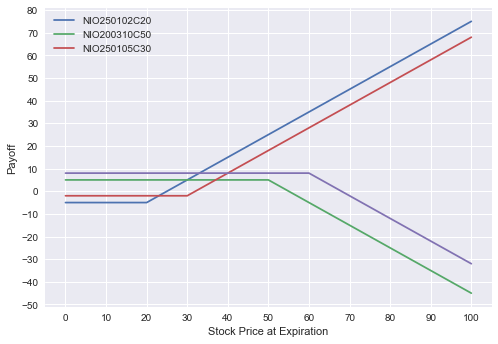

In [172]:
bc20 = Call('NIO', '2025-01-02', 'buy', 20, 5)
sc50 = Call('NIO', '2020-03-10', 'sell', 50, 5)
bp30 = Call('NIO', '2025-01-05', 'buy', 30, 2)
sp60 = Call('NIO', '2025-01-05', 'sell', 60, 8)

bc20.graph()
sc50.graph()
bp30.graph()
sp60.graph()
